<img src="apples.jpeg" style="width: 400px; height: 200px; float: right; margin: 10px; border: 2px solid #000; box-sizing: border-box;">

# Quality grading of apples
***
The dataset contains characteristics such as size, weight, sweetness, crispness, juiciness, ripeness, acidity, and quality.</br>
Based on the input numerical data, the model estimates what the quality of the apple will be (good/bad) in the end.  
  
Data source: [kaggle.com](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apples = pd.read_csv('datasets/apple_quality.csv')

In [3]:
apples.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [4]:
apples.shape

(4001, 9)

In [5]:
# The acidity column initially is of "object" type, which later causes issues with ML algorithms, so I handled this in time.
apples['Acidity'] = pd.to_numeric(apples['Acidity'], errors='coerce')
apples.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75%       1.835976     1.766212     1.510493  
max       7.364403     7.237837     7.404736

In [6]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [7]:
apples.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

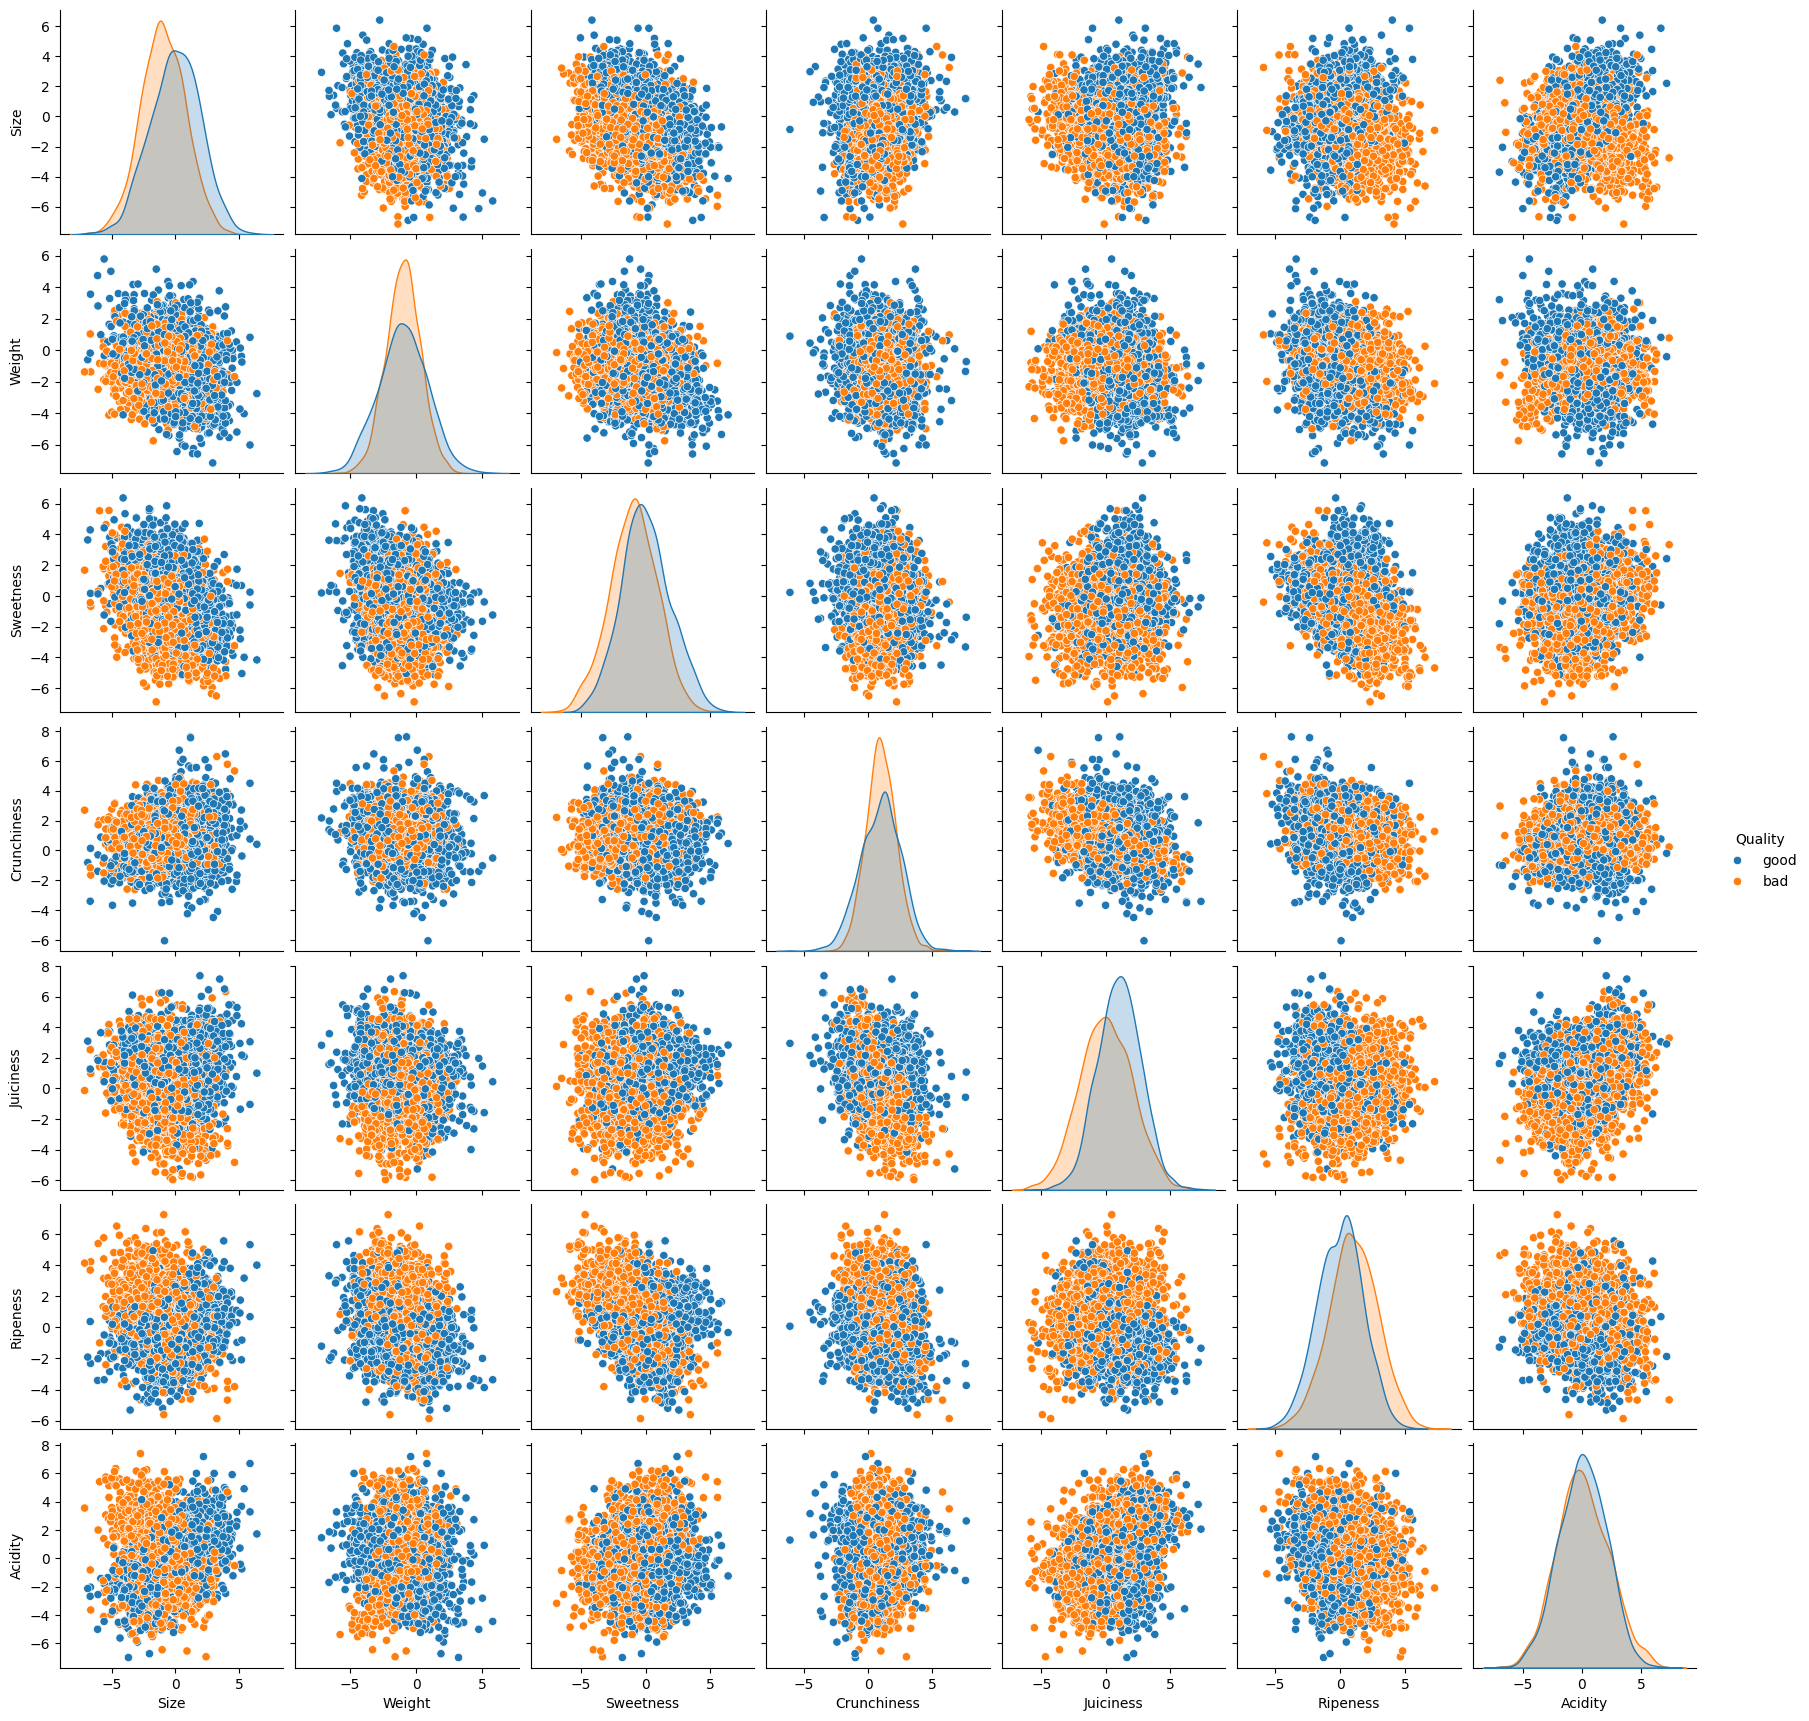

In [8]:
# Although the "A_id" column is incorrectly of type float64, I simply didn't include it in the chart drawing; I didn't modify it like the "Acidity" column.
g = sns.pairplot(apples.drop(columns='A_id'), hue='Quality')

<Axes: xlabel='Size', ylabel='Sweetness'>

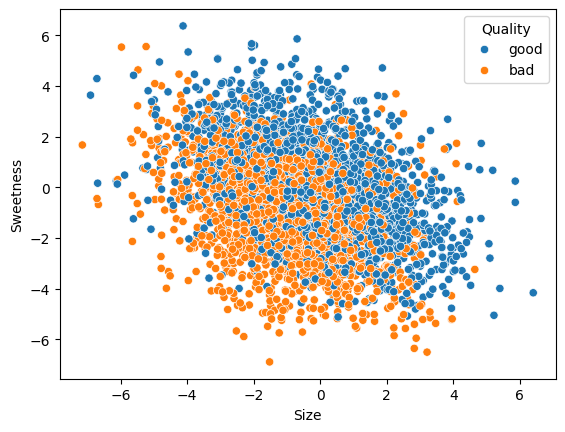

In [9]:
# The lower one seemed to be the most separable among the plots
sns.scatterplot(x='Size', y='Sweetness', hue='Quality', data=apples)

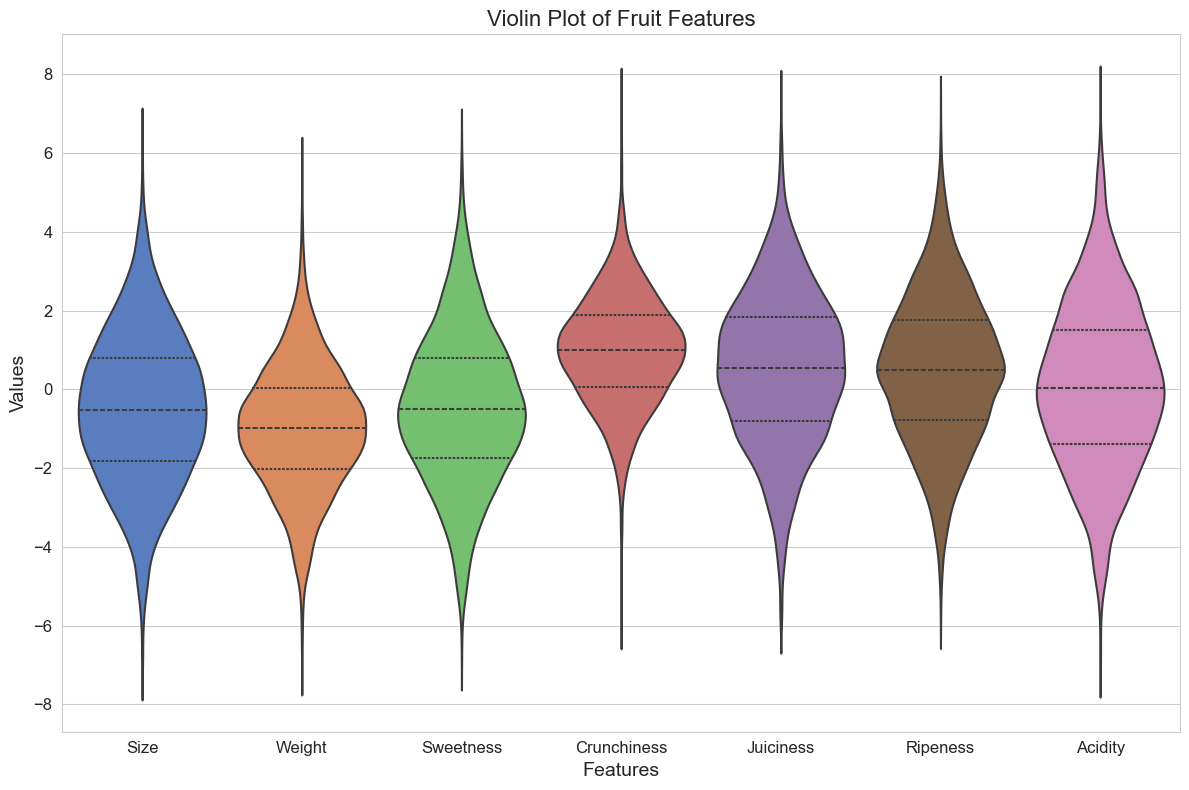

In [10]:
apples_clean = apples.drop('A_id', axis=1)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(data=apples_clean, inner="quartile", palette="muted", linewidth=1.5)
plt.title("Violin Plot of Fruit Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [12]:
# The ML algorithm counted the last row as empty, so I deleted it to avoid errors.
apples = apples.dropna()

In [13]:
apples

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
0    -0.491590    good  
1    -0.722809    good  
2     2.621636     bad  
3     0.790723    good  
4     0.501984    good  
...        ...     ...  
3995  0.137784     bad  
3996  1.854235    good  
3997 -1.334611     bad  
3998 -2.229720    good  
3999  1.599796    good  

[4000 rows x 9 columns]

In [14]:
apple_feature = apples.drop(['A_id', 'Quality'], axis=1)
apple_target = apples['Quality']

In [15]:
apple_feature_train, apple_feature_test, apple_target_train, apple_target_test = train_test_split(
    apple_feature, apple_target, test_size=0.2, random_state=11111)

In [16]:
apple_feature_train

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
347  -1.107686  0.419847  -0.784380     0.489854   4.140066  2.333638   
2278 -1.346707 -2.293758   0.309239     1.535802  -0.278842  0.056952   
962  -1.719886 -1.664452   0.446356     1.557677   2.120095  0.657711   
2534 -0.485155 -3.655567   0.164346     0.965474   3.748740 -2.989809   
3027 -1.987301 -0.512449   2.029871    -0.899804   1.134417  1.278730   
...        ...       ...        ...          ...        ...       ...   
2740 -0.111685  0.489788  -0.333828    -1.265075   0.343857  1.031916   
502  -3.317159  0.105307   3.542141     2.550257  -2.113224 -3.586288   
2111 -0.694672 -1.573373  -2.501968     2.817213  -3.079667  2.544749   
3705  0.722923 -2.815059  -2.233039     0.526597   1.855821  1.249779   
804  -0.276872 -1.280344   1.377730    -0.607730  -1.349680  2.688240   

       Acidity  
347  -1.815198  
2278  4.324596  
962  -0.977912  
2534  0.508299  
3027 -2.327120  
...        ...  
2740 -4.865750  
502   5.305218  
2111  0.518192  
3705 -0.633685  
804  -0.058600  

[3200 rows x 7 columns]

In [17]:
# Verification to check for any NaN values.
apple_feature_train.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
dtype: int64

In [18]:
# Strings cannot be handled as target objects, so they need to be encoded into a numpy array.
label_encoder = LabelEncoder()
apple_target_train_encoded = label_encoder.fit_transform(apple_target_train)

In [19]:
# This is what the resulting numpy array looks likeapple_target_train_encoded
apple_target_train_encoded[:20]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import classification_report
# Applying the Support Vector Machines method seems like a good idea here, so we create an instance of the object
svc = SVC()

# Training the SVM classifier
svc.fit(apple_feature_train, apple_target_train_encoded)

# Predictions from the test dataset
apple_target_predicted = svc.predict(apple_feature_test)

# Decoding the predictions to get back the original strings
apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

# Generating classification report
report = classification_report(apple_target_test, apple_target_predicted_decoded)

# Extracting precision and recall from the classification report
precision_recall = classification_report(apple_target_test, apple_target_predicted_decoded, output_dict=True)

# Extracting precision and recall for each class
precision = precision_recall['weighted avg']['precision']
recall = precision_recall['weighted avg']['recall']

# Calculating accuracy
accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)

# Printing metrics
print("Accuracy:", accuracy)
print("Precision:", round(precision,4))
print("Recall:", recall, "\n")

# Printing classification report
print("Classification Report:\n", report)

Accuracy: 0.875
Precision: 0.8782
Recall: 0.875 

Classification Report:
               precision    recall  f1-score   support

         bad       0.91      0.83      0.87       406
        good       0.84      0.92      0.88       394

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.87       800
weighted avg       0.88      0.88      0.87       800



***
<em>So, without any calculations, we have a fifty-fifty chance of guessing whether the apple is good or not.
It's worth looking into other methods as well.</em>
***

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import time

# Scaling the features with StandardScaler
scaler = StandardScaler()
scaled_apple_feature = scaler.fit_transform(apple_feature)

methods = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('C-Support Vector Classification', SVC()),
]

method_names = []
method_accuracy = []
method_precision = []
method_recall = []
method_execution_time = []

for name, model in methods:
    start_time = time.time()
    
    kfold = StratifiedKFold(n_splits=10, random_state=11111, shuffle=True)
    cv_results = cross_val_score(model, apple_feature, apple_target, cv=kfold, scoring='accuracy')
    accuracy = 100*cv_results.mean()

    end_time = time.time()
    execution_time = end_time - start_time

    model.fit(apple_feature, apple_target)
    predictions = model.predict(apple_feature)

    # Calculating precision and recall
    report = classification_report(apple_target, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    print(f'{name}:')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Execution Time: {execution_time:.3f} s\n')
    
    method_names.append(name)
    method_accuracy.append(accuracy)
    method_precision.append(precision)
    method_recall.append(recall)
    method_execution_time.append(execution_time)

Logistic Regression:
Accuracy: 74.85%
Precision: 0.75
Recall: 0.75
Execution Time: 0.113 s

Linear Discriminant Analysis:
Accuracy: 74.70%
Precision: 0.75
Recall: 0.75
Execution Time: 0.102 s

K-Neighbors Classifier:
Accuracy: 89.75%
Precision: 0.94
Recall: 0.94
Execution Time: 0.341 s

Decision Tree Classifier:
Accuracy: 80.75%
Precision: 1.00
Recall: 1.00
Execution Time: 0.374 s

Gaussian Naive Bayes:
Accuracy: 75.03%
Precision: 0.75
Recall: 0.75
Execution Time: 0.081 s

C-Support Vector Classification:
Accuracy: 89.08%
Precision: 0.90
Recall: 0.90
Execution Time: 2.348 s



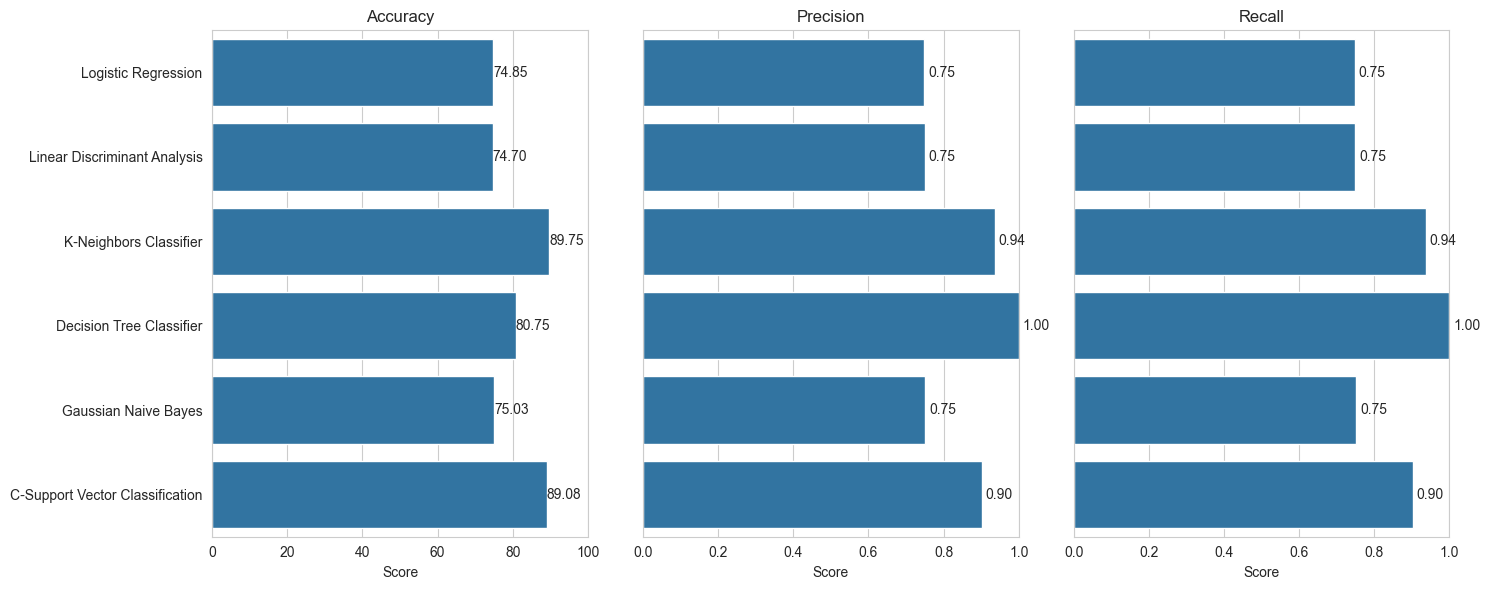

In [22]:
# Combine all metrics into one dataframe
results_df = pd.DataFrame({
    'Method': method_names,
    'Accuracy': method_accuracy,
    'Precision': method_precision,
    'Recall': method_recall
})

# Melt the dataframe to have one row per method and metric
results_melted = results_df.melt(id_vars='Method', var_name='Metric', value_name='Score')

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    ax = sns.barplot(
        data=results_melted[results_melted['Metric'] == metric],
        x='Score',
        y='Method',
        dodge=False,
        ax=axes[i]
    )
    if metric == 'Accuracy':
        ax.set_xlim(0, 100)
    else:
        ax.set_xlim(0, 1)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    ax.set_ylabel('')

    for p in ax.patches:
        ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()

***
I'll run the best performing **DTC method** separately:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(apple_feature_train, apple_target_train_encoded)

apple_target_predicted = dt_classifier.predict(apple_feature_test)

apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)
print("Accuracy:", accuracy)

precision = precision_score(apple_target_test, apple_target_predicted_decoded, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(apple_target_test, apple_target_predicted_decoded, average='weighted')
print("Recall:", recall)

Accuracy: 0.8025
Precision: 0.8040
Recall: 0.8025


I'll also print out the confusion matrix:

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(apple_target_test, apple_target_predicted_decoded)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[314  92]
 [ 66 328]]


Text(0.5, 1.0, 'Method Execution Time')

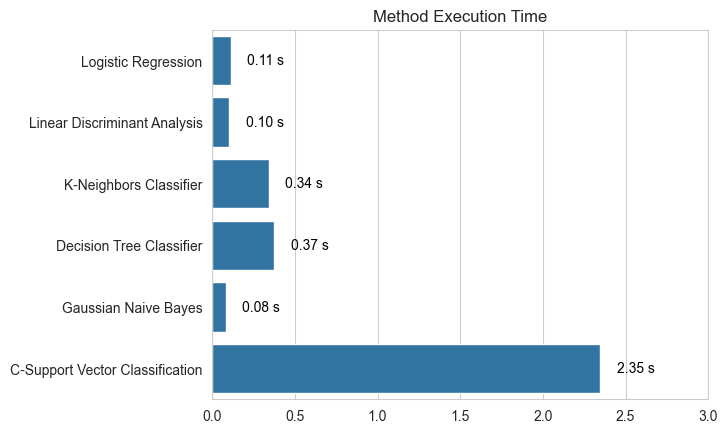

In [25]:
import math

ax2 = sns.barplot(
        y=method_names,
        x=method_execution_time
        )

ax2.set_xlim(0, math.ceil(max(method_execution_time)))

for i, v in enumerate(method_execution_time):
    ax2.text(v + 0.1, i, f'{v:.2f} s', va='center', fontsize=10, color='black')
    
ax2.set_title("Method Execution Time")

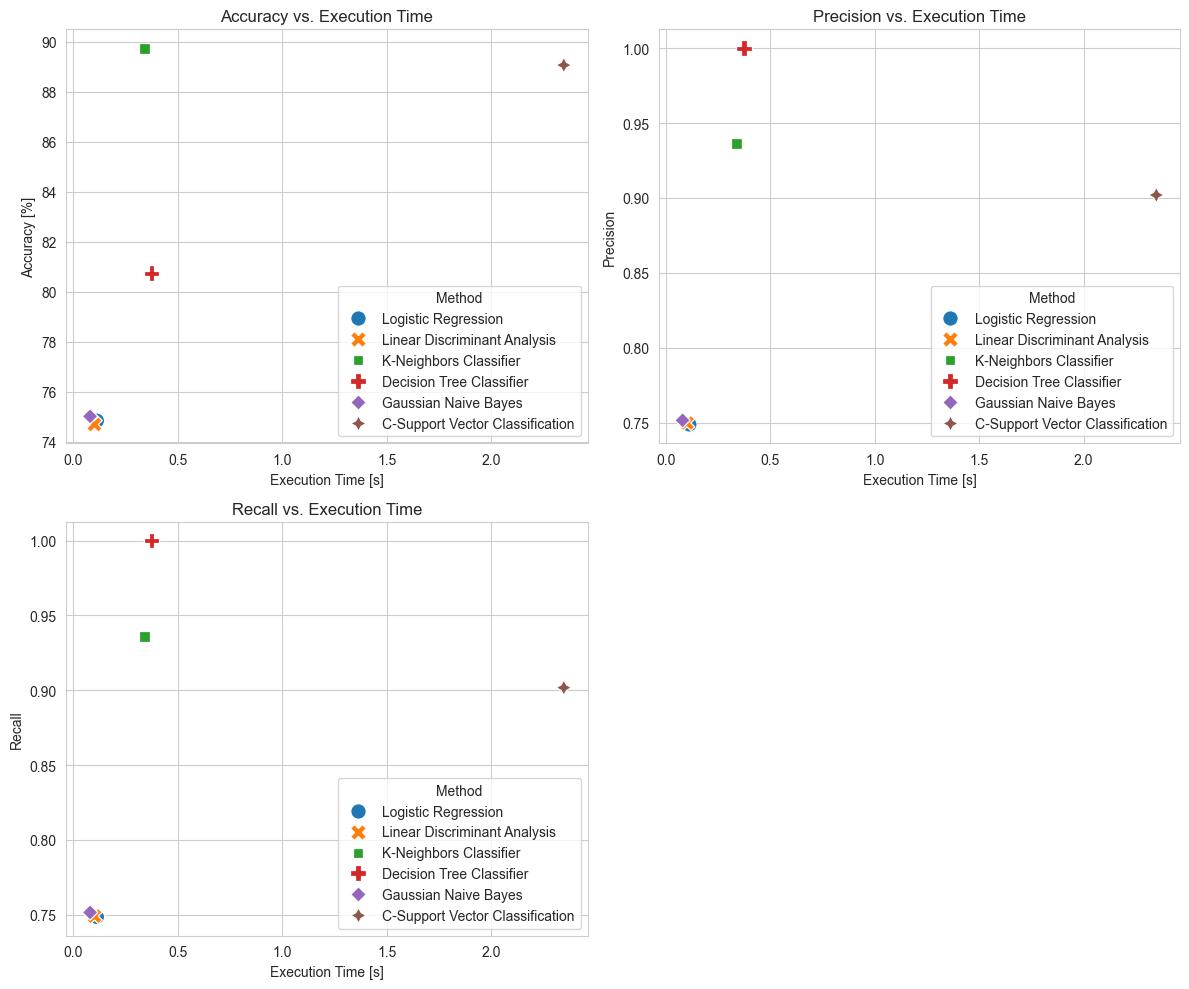

In [26]:
results_df = pd.DataFrame({
    'Method': method_names,
    'Accuracy': method_accuracy,
    'Precision': method_precision,
    'Recall': method_recall,
    'Execution Time': method_execution_time
})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

p1 =sns.scatterplot(
    x='Execution Time',
    y='Accuracy',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Accuracy vs. Execution Time")
axes[0, 0].set_xlabel("Execution Time [s]")
axes[0, 0].set_ylabel("Accuracy [%]")
sns.move_legend(p1, "lower right")

p2 = sns.scatterplot(
    x='Execution Time',
    y='Precision',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Precision vs. Execution Time")
axes[0, 1].set_xlabel("Execution Time [s]")
axes[0, 1].set_ylabel("Precision")
sns.move_legend(p2, "lower right")


p3 = sns.scatterplot(
    x='Execution Time',
    y='Recall',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Recall vs. Execution Time")
axes[1, 0].set_xlabel("Execution Time [s]")
axes[1, 0].set_ylabel("Recall")
sns.move_legend(p3, "lower right")


axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Examining the effect of features with Shapley

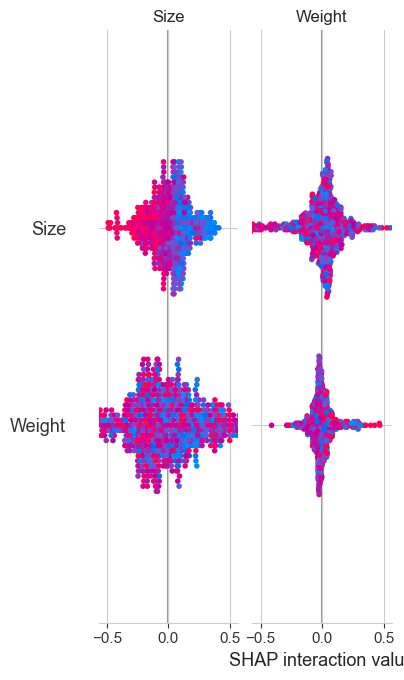

In [27]:
import shap

# Using dt_classifier from DTC calculation
explainer = shap.TreeExplainer(dt_classifier)
shap_values = explainer.shap_values(apple_feature_test)
shap.summary_plot(shap_values, apple_feature_test, feature_names=apple_feature_test.columns, plot_type="bar")

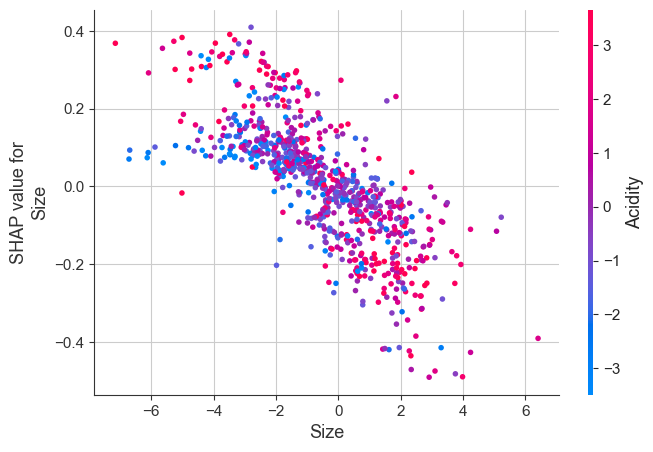

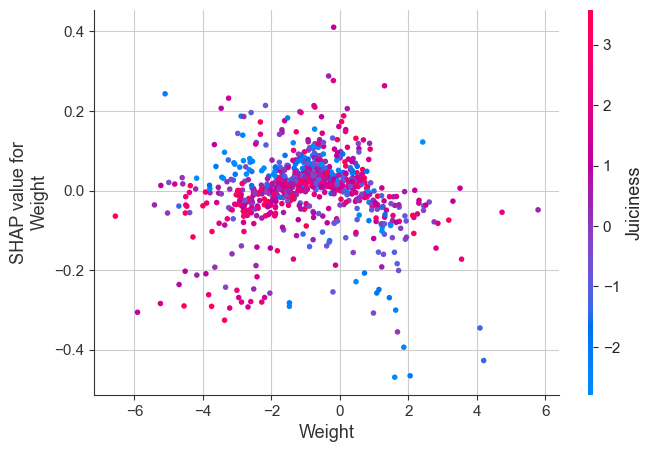

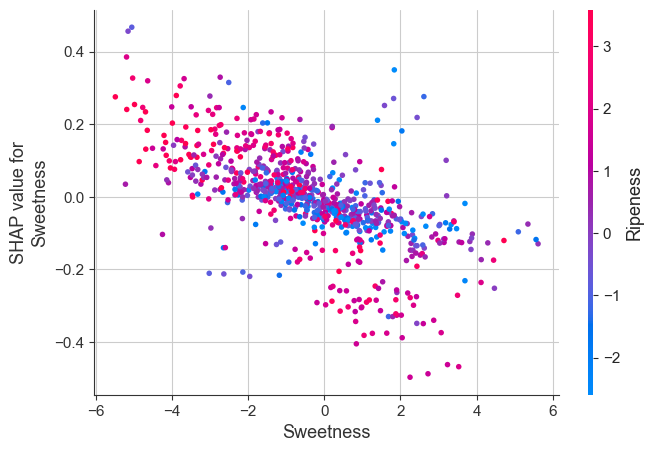

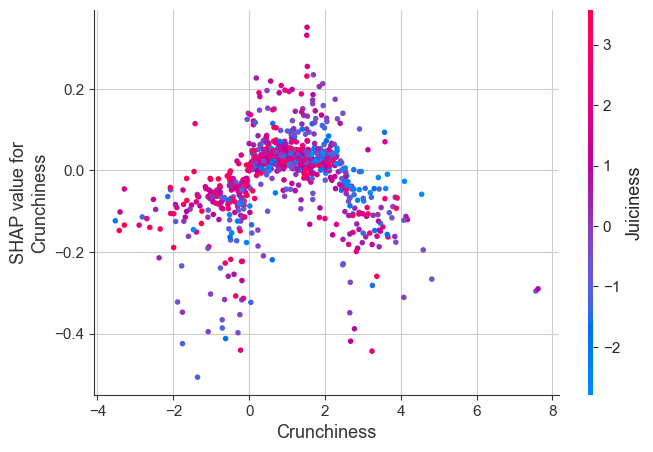

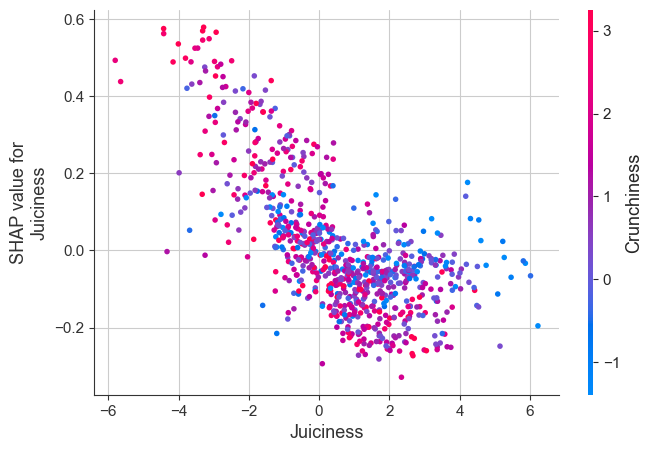

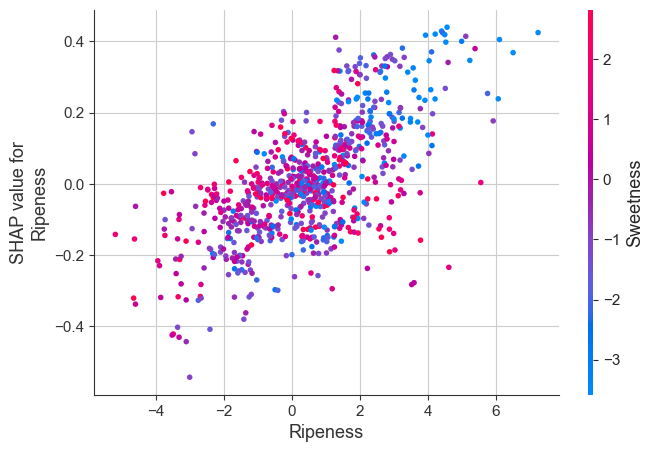

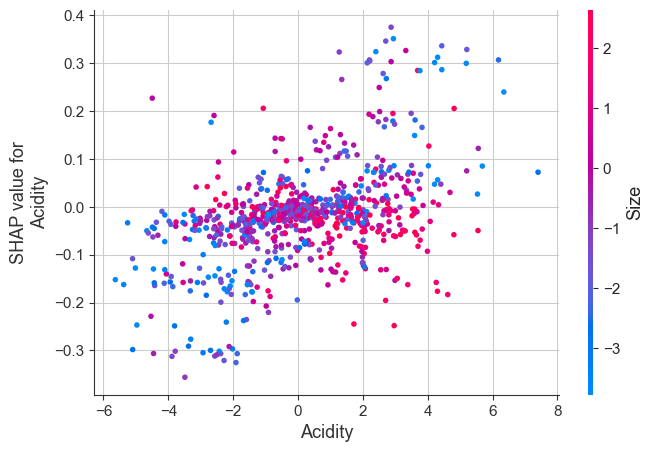

In [43]:
features = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
shap_values_2d = shap_values[:,:,0]

for feature in features:
    shap.dependence_plot(feature, shap_values_2d, apple_feature_test)

In [29]:
apple_feature_test.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

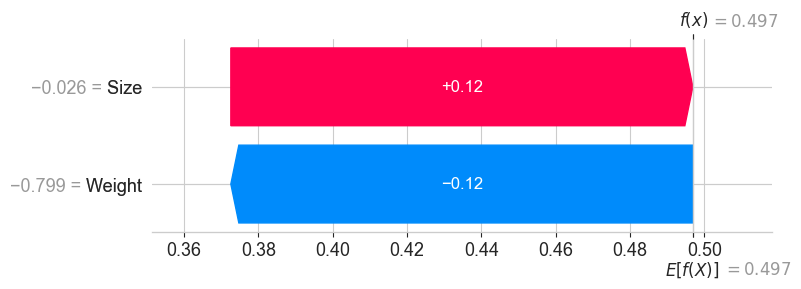

In [30]:
import shap
import matplotlib.pyplot as plt

# Assuming dt_classifier, apple_feature_train, apple_target_train_encoded,
# apple_feature_test, and label_encoder are defined

# Train the classifier
dt_classifier.fit(apple_feature_train, apple_target_train_encoded)

# Create a SHAP explainer
explainer = shap.TreeExplainer(dt_classifier)

# Calculate SHAP values for a specific instance
instance_index = 0  # Choose the index of the instance for which you want to create the waterfall plot
shap_values_instance = explainer.shap_values(apple_feature_test.iloc[instance_index])

# Create an Explanation object
explanation = shap.Explanation(
    values=shap_values_instance[0],
    base_values=explainer.expected_value[0],
    data=apple_feature_test.iloc[instance_index],
    feature_names=apple_feature_test.columns
)

# Create the waterfall plot with all features
shap.waterfall_plot(explanation, max_display=len(apple_feature_test.columns))

# Show the plot
plt.show()

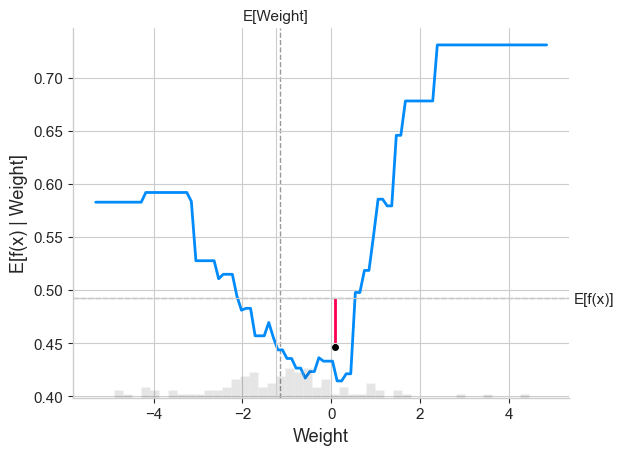

In [40]:
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(apple_feature_train, apple_target_train_encoded)

X100 = shap.utils.sample(apple_feature_train, 100)  # 100 instances for use as the background distribution
sample_ind = 20

explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(apple_feature_train)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "Weight",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)